# Question 1
 Sachant que les modèles ARIMA et SARIMA sont des régression linéaires qui prennent comme variables explicatives les “lags” (les états précédents) de notre time série. Pourquoi est-on si attaché au fait que notre série temporelle soit stationnaire ?

La stationnarité d'une serie temporelle assure que celle-ci ait des résultats stables dans le temps (donc plus facilement prédictibles)
De plus, si la serie a une tendance croissante ou décroissante, cela rendrait plus difficile l'interpretation des resultats

# Question 2
Qu’est qu’un modèle AR, à quoi correspond le paramètre p ?

le terme "p" signifie le nombre de "lags" utlisés comme références pour effectuer les prédictions dans le futur

# Question 3
Qu’est ce qu’un modèle MA, à quoi correspond le paramètre q?

le terme "q" se réfere au degré de lissage par moyenne mobile effectué sur la serie temporelle

# Question 4
Qu’est ce que le modèle ARIMA et à quoi correspond le paramètre d?

le terme "d" signifie le nombre de differenciations (operations consistant à calculer la difference entre une valeur de serie temporelle et celle qui la précéde) necessaires pour obtenir une serie temporelle stationnaire

# Question 5
Qu’est ce que le modèle SARIMA et à quoi correspond le paramètre s?

SARIMA est un modele similaire à ARIMA mais qui est adapté aux time series caracterisées par une Saisonalité

# Question 6

Déterminer les paramètres s, d, q, p  à l’aide des graphiques d’autocorrélation et d’autocorrélation partielle, ainsi qu’à l’aide des graphiques de la première partie.
- Déterminer d’abord s et appliquer la désaisonnalisation
- Sur la série désaisonnalisée recherchez d et détrendez
- Sur la série détrendée, recherchez q et p

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv("datafiles/consommation-quotidienne-brute-regionale.csv", sep=";", index_col="date_heure", parse_dates=True)

In [132]:
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index, utc=True, format='%Y-%m-%d %H:%M:%S%z')
df = df.loc[df.region == "Hauts-de-France"]
serie_q3 = df.consommation_brute_electricite_rte.resample("D").mean()
serie_q3 = serie_q3.sort_index()

<AxesSubplot: xlabel='date_heure'>

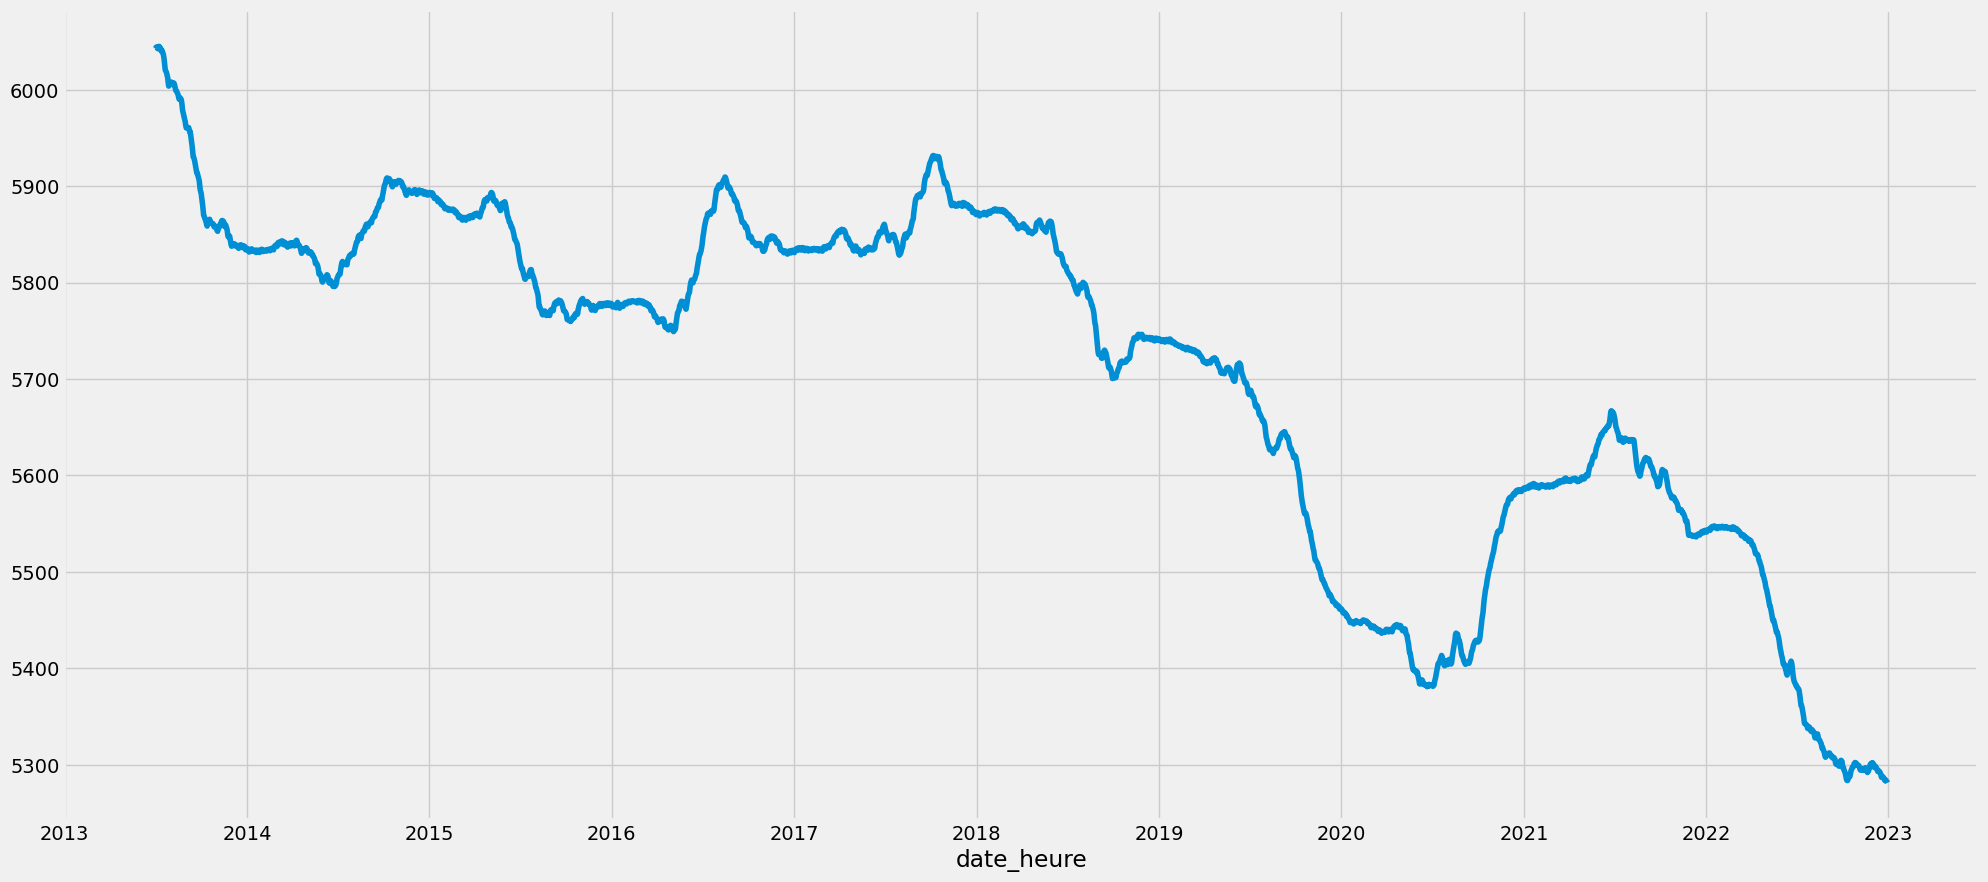

In [133]:
serie_q3 = serie_q3.sort_index()
plt.figure(figsize=(22,10))
serie_q3.rolling(window=365,center=True).mean().plot()

<AxesSubplot: xlabel='date_heure'>

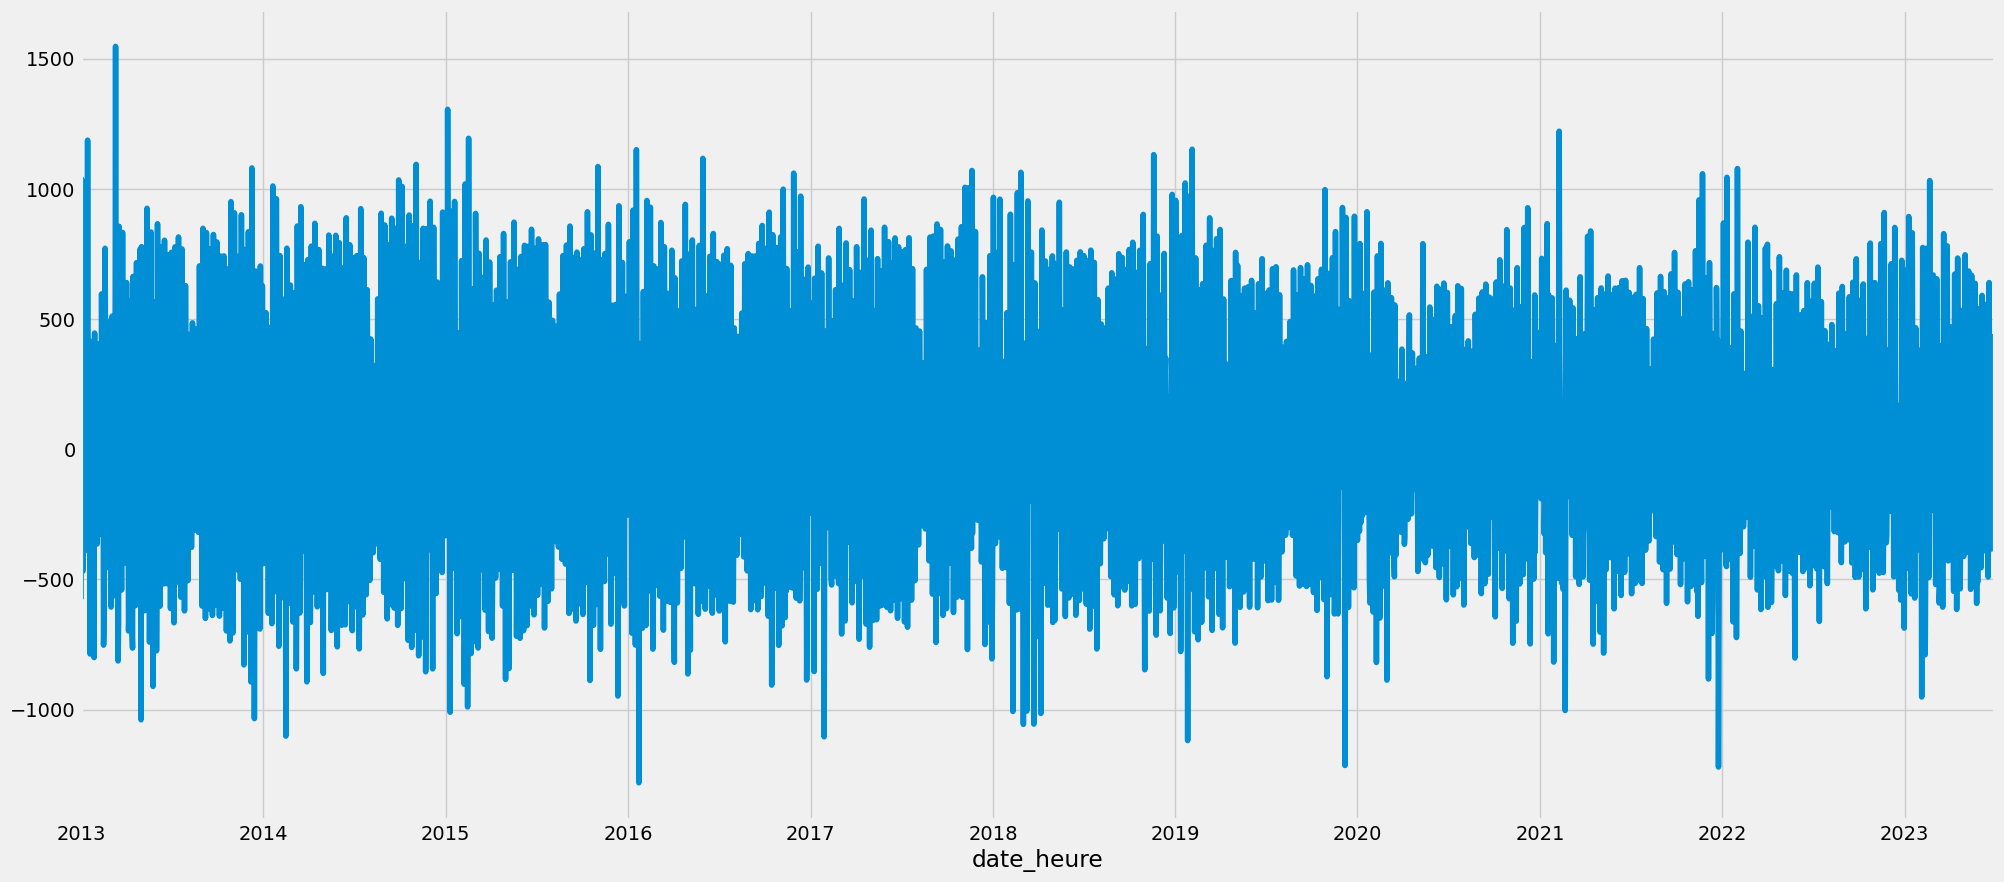

In [134]:
serie_q3 = serie_q3.diff()
serie_q3.plot(figsize=(22,10))

/Users/maximer/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/matplotlib/axes/_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


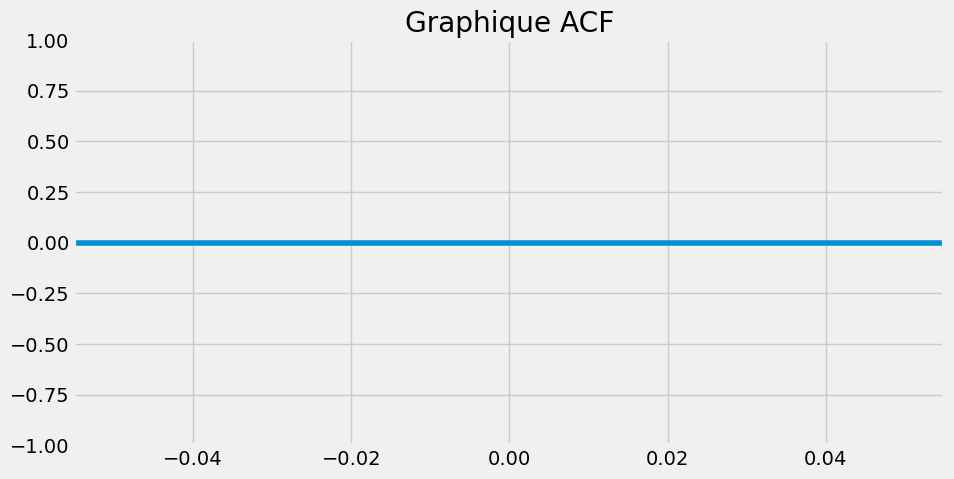

/Users/maximer/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


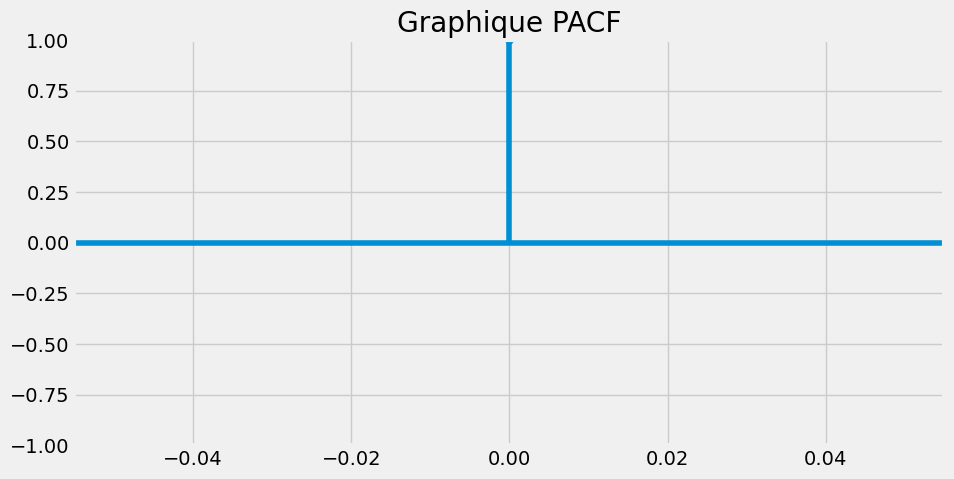

In [135]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

serie_q3.dropna()
fig, ax = plt.subplots(figsize=(10, 5))
sm.graphics.tsa.plot_acf(serie_q3, lags=40, ax=ax)
plt.title('Graphique ACF')
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
sm.graphics.tsa.plot_pacf(serie_q3, lags=40, ax=ax)
plt.title('Graphique PACF')
plt.show()

# Question 7
A l’aide statmodels et dans une approche statistique (sans train/test/split), lancez un modèle ARIMA sur la série désaisonnalisée. 
- Est ce que tous les paramètres sont significatifs
- Qu’est ce que l’AIC?
- Essayez d’améliorer votre modèle en modifiant les paramètres non significatifs et en vous basant sur le critère de l’AIC.


L'AIC est une mesure utilisée pour comparer differents modèles, il mesure la complexité d'un modèle  ainsi que l'ajustement de celui ci à ses données d'entrainement. 
L'objectif etant d'avoir le modèle le plus simple possible, mais qui s'ajuste le mieux possible au données
On préferera un AIC bas à un AIC haut car plus celui ci est bas, plus il estime que le modèles est adapté

In [136]:
model = sm.tsa.ARIMA(serie_q3, order=(7, 1, 3)) #(p,d,q)
fitted_model = model.fit()
fitted_model.summary()

/Users/maximer/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maximer/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/maximer/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:     consommation_brute_electricite_rte   No. Observations:                 3834
Model:                                 ARIMA(7, 1, 3)   Log Likelihood              -26509.249
Date:                                Tue, 19 Sep 2023   AIC                          53040.498
Time:                                        16:50:13   BIC                          53109.264
Sample:                                    12-31-2012   HQIC                         53064.927
                                         - 06-30-2023                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1536      0.025     -6.061      0.000      -0.203      -0.104
ar.L2         -0.3064      0.025    -12.395      0.000      -0.355      -0.258
ar.L3         -0.1921      0.019    -10.321      0.000      -0.229      -0.156
ar.L4         -0.2106      0.020    -10.785      0.000      -0.249      -0.172
ar.L5         -0.2535      0.018    -14.391      0.000      -0.288      -0.219
ar.L6         -0.1416      0.019     -7.292      0.000      -0.180      -0.104
ar.L7          0.5347      0.018     29.932      0.000       0.500       0.570
ma.L1         -0.8860      0.027    -32.420      0.000      -0.940      -0.832
ma.L2          0.0136      0.033      0.414      0.679      -0.051       0.078
ma.L3         -0.1151      0.027     -4.214      0.000      -0.169      -0.062
sigma2       6.51e+04   1257.459     51.770      0.000    6.26e+04    6.76e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               487.36
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.04
Prob(H) (two-sided):                  0.52   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Question 8
Affichez les résidus du meilleurs des modèles que vous avez jusqu’à présent, pourquoi recherche t-on un bruit blanc ou l’absence de pattern dans ces résidus? Que constatez vous pour le graphique affiché?

# XGBoost lag uniquement

In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score


serie_q3['date_heure'] = pd.to_datetime(serie_q3['date_heure'])
serie_q3.set_index('date_heure', inplace=True)

KeyError: 'date_heure'

In [ ]:

for i in range(1, 7):  # Nombre de lags
    serie_q3[f'lag_{i}'] = data['consommation_brute_electricite_rte'].shift(i)

data = serie_q3.dropna()

X = data.drop('consommation_brute_electricite_rte', axis=1)
y = data['consommation_brute_electricite_rte']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, )


In [ ]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)
print(f'R2 : {r2_score(y_test, y_pred)}')

RMSE : 229.38879545064597
R-squared : 0.6461312372614787
